In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "HDFCBANK.NS"
Stock_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
Stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-06,37.099998,37.799999,36.924999,37.715000,32.483139,1438940
2004-09-07,37.980000,38.500000,37.560001,38.180000,32.883621,3505010
2004-09-08,38.209999,40.035000,37.200001,39.404999,33.938698,15073640
2004-09-09,39.900002,40.340000,37.849998,38.189999,32.892242,16423720
2004-09-10,38.299999,39.470001,38.224998,38.959999,33.555424,8138220


In [6]:
Stock_data.shape

(4941, 6)

In [7]:
Stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4.941000e+03
mean,641.023316,647.114759,634.497512,640.938764,611.083031,7.780250e+06
std,542.998803,547.340919,538.442071,542.872042,532.971338,8.107373e+06
min,37.099998,37.799999,36.924999,37.715000,32.483139,0.000000e+00
25%,163.500000,167.320007,161.220001,164.335007,145.266510,3.426118e+06
50%,422.375000,427.774994,418.600006,423.200012,391.478058,5.600510e+06
75%,1098.525024,1110.000000,1084.000000,1094.550049,1049.880615,9.421702e+06
max,1791.000000,1794.000000,1764.650024,1768.650024,1768.650024,2.226710e+08


In [8]:
Stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4941 entries, 2004-09-06 to 2024-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4941 non-null   float64
 1   High       4941 non-null   float64
 2   Low        4941 non-null   float64
 3   Close      4941 non-null   float64
 4   Adj Close  4941 non-null   float64
 5   Volume     4941 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 270.2 KB


In [9]:
Stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Stock data')

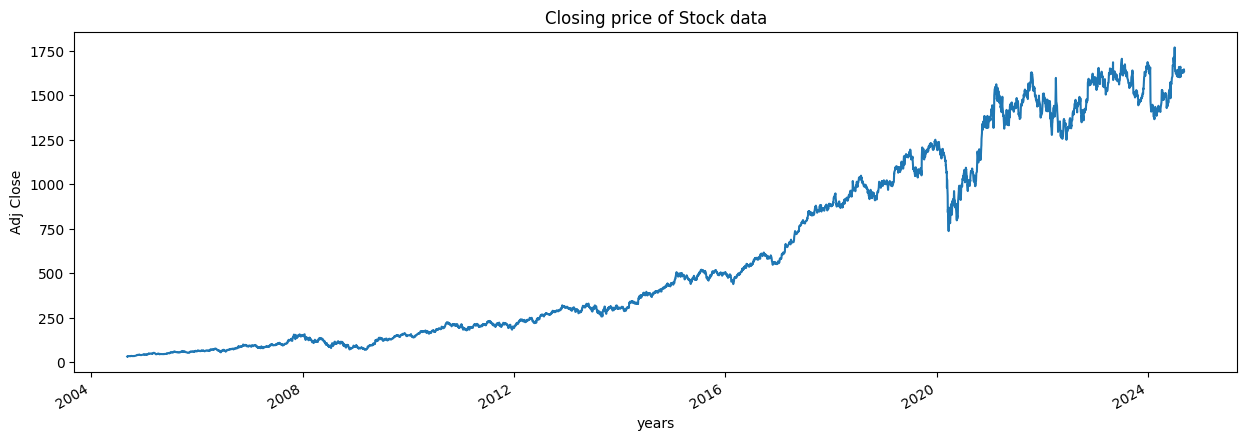

In [11]:
plt.figure(figsize = (15,5))
Stock_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Stock data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Stock data")
    

In [13]:
Stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

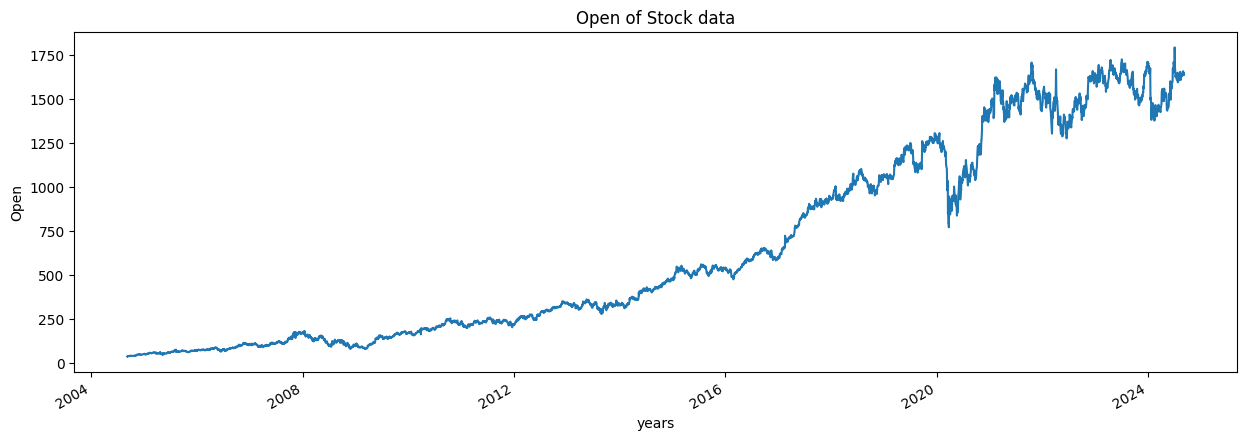

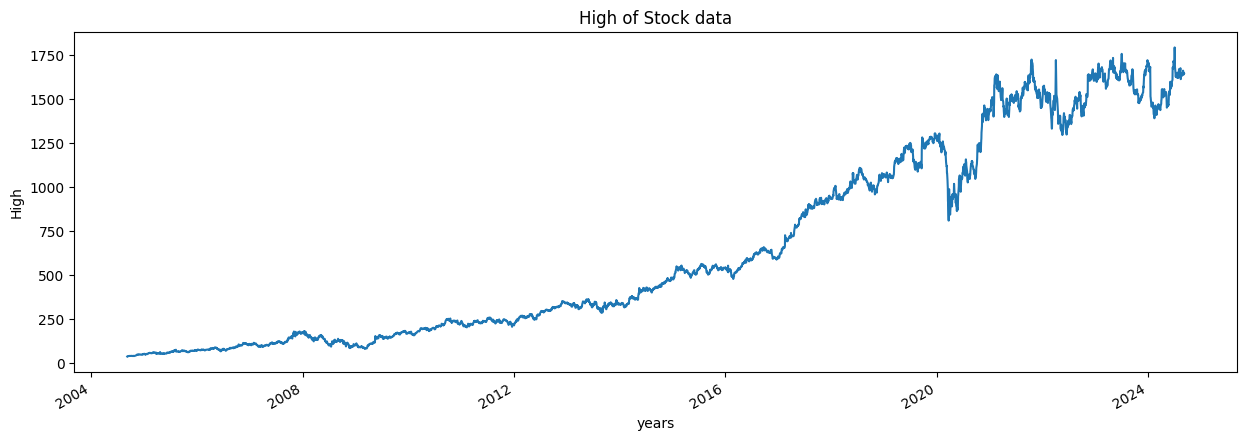

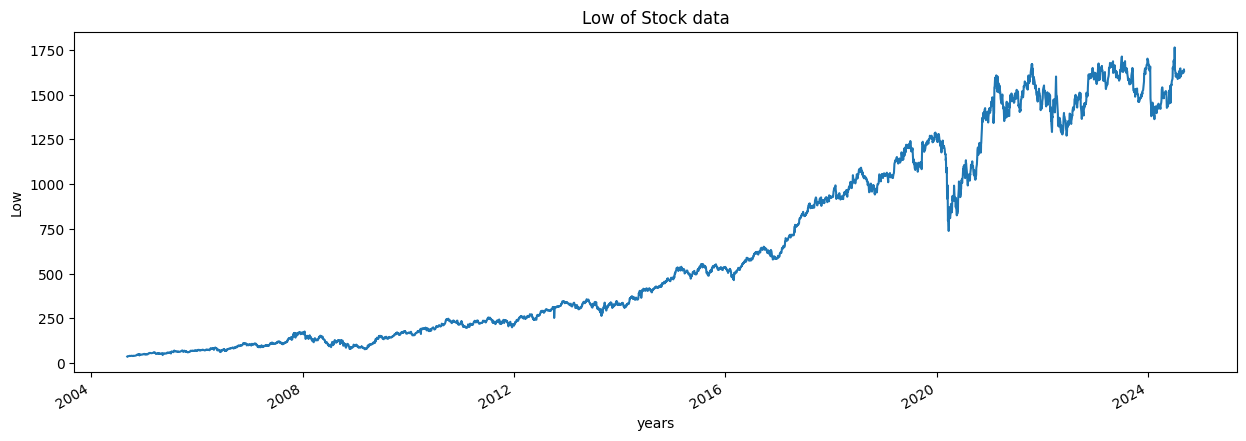

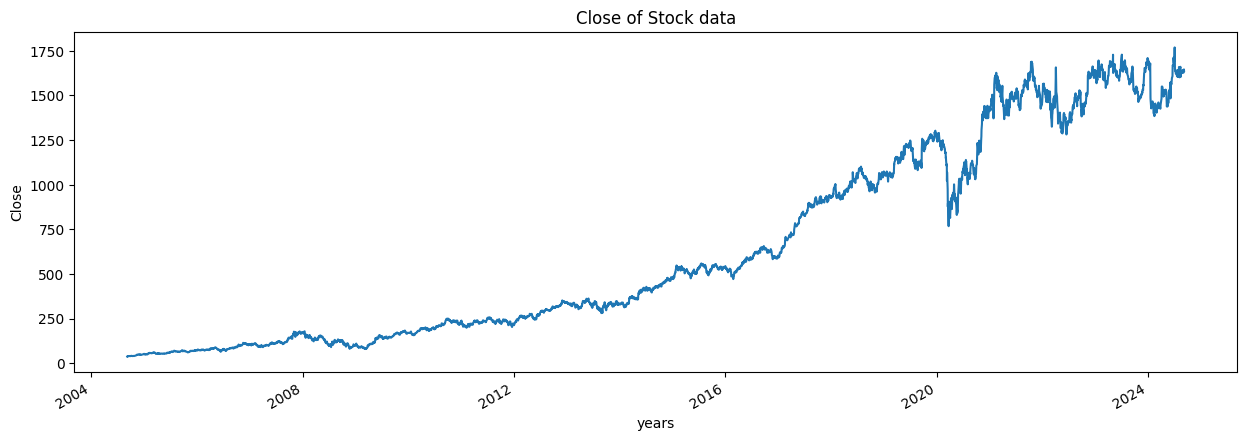

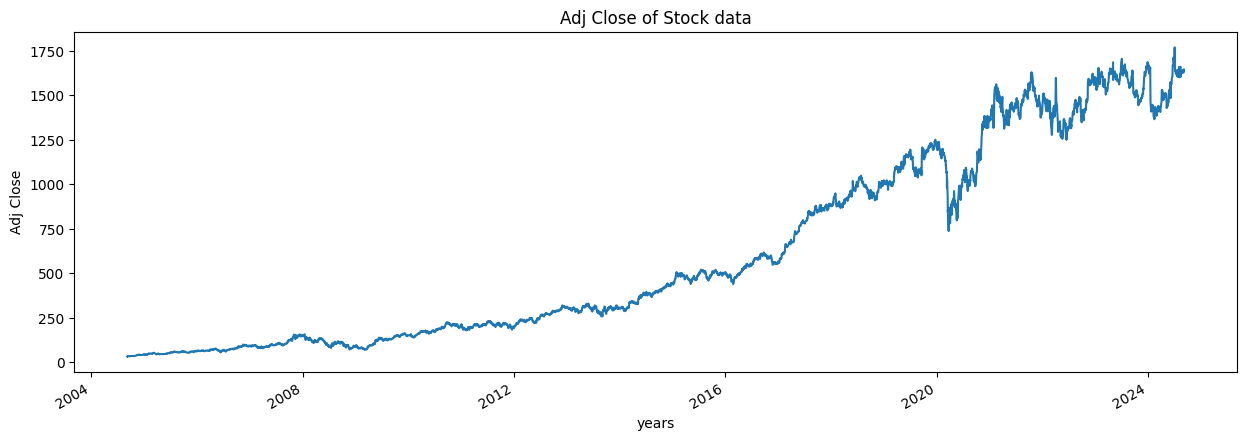

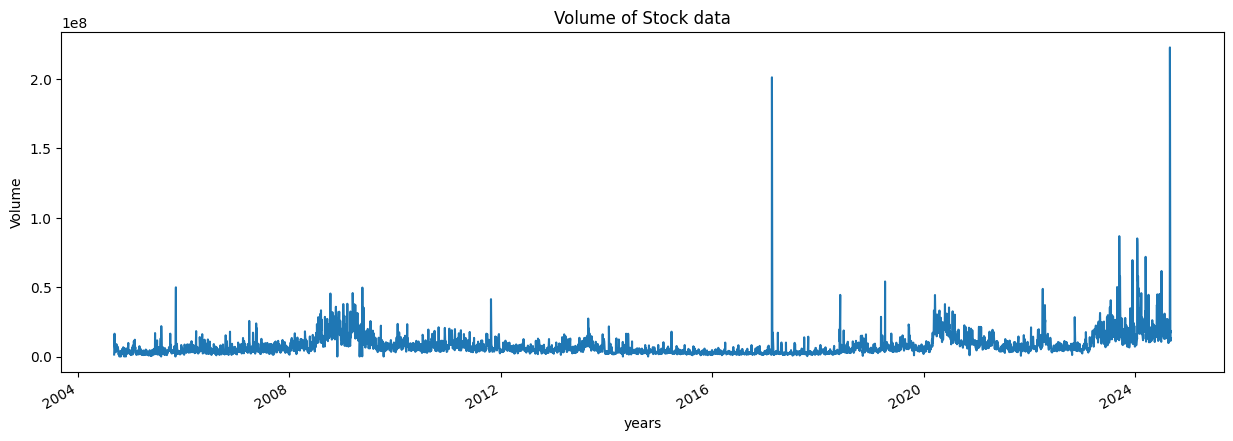

In [14]:
for column in Stock_data.columns:
    plot_graph((15,5),Stock_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2015,2025):
    print(i,list(Stock_data.index.year).count(i))

2015 246
2016 246
2017 248
2018 246
2019 243
2020 251
2021 248
2022 248
2023 245
2024 168


In [20]:
Stock_data['MA_for_250_days'] = Stock_data['Adj Close'].rolling(5).mean()

In [21]:
Stock_data['MA_for_250_days'][0:5].tail()

Date
2004-09-06          NaN
2004-09-07          NaN
2004-09-08          NaN
2004-09-09          NaN
2004-09-10    33.150625
Name: MA_for_250_days, dtype: float64

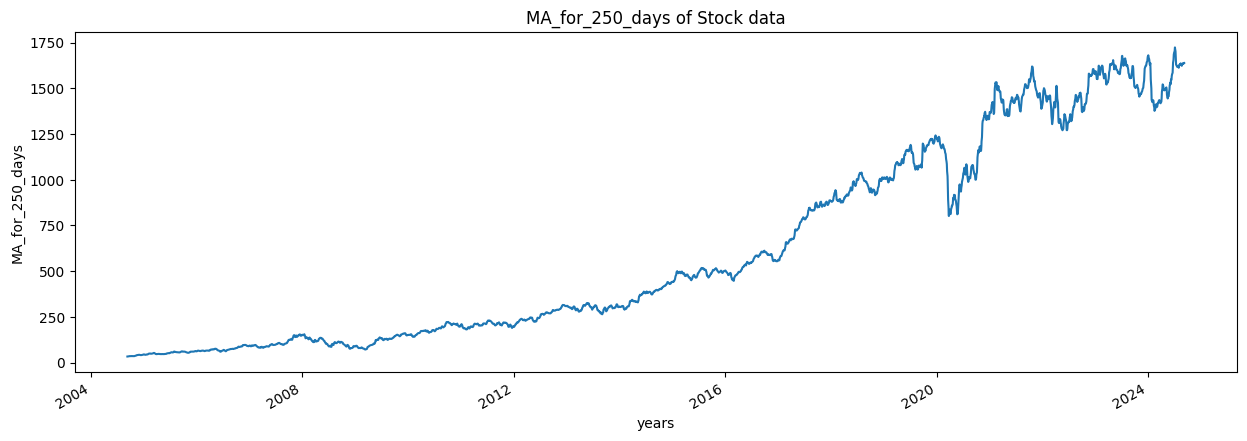

In [22]:
plot_graph((15,5), Stock_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

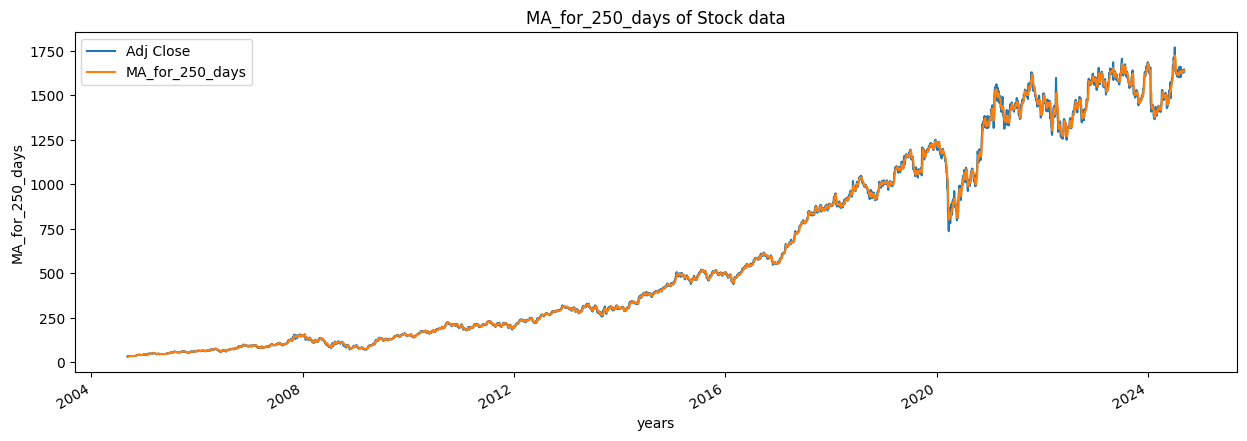

In [23]:
plot_graph((15,5), Stock_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

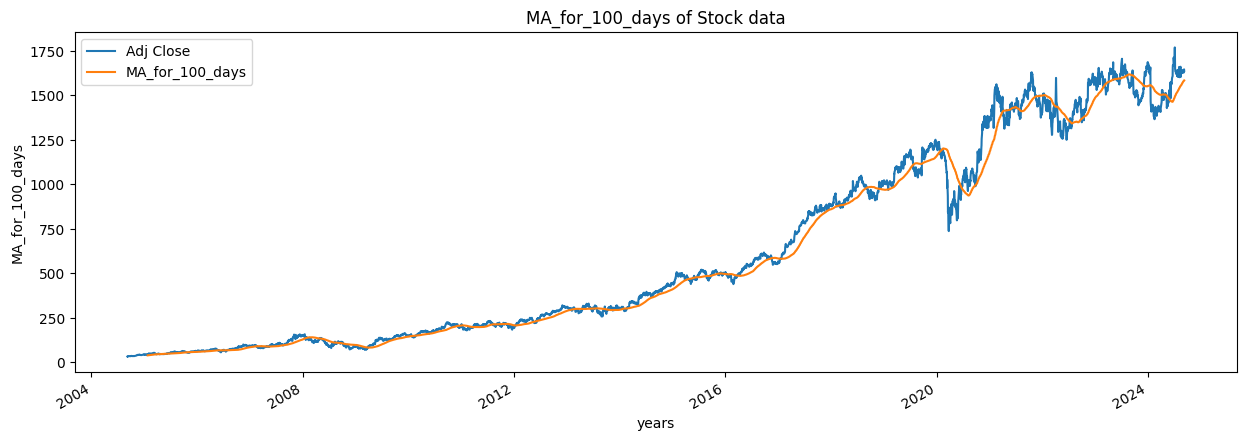

In [24]:
Stock_data['MA_for_100_days'] = Stock_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), Stock_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

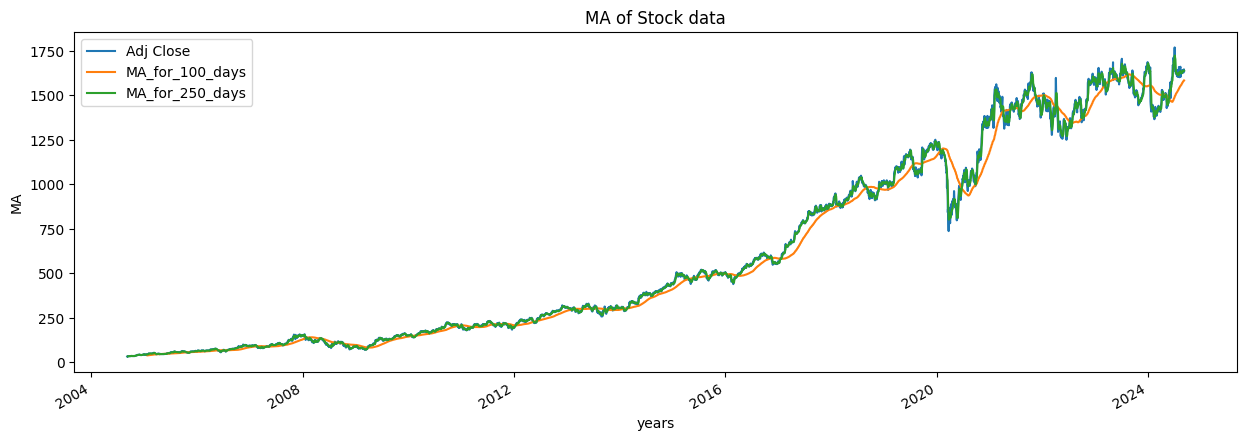

In [25]:
plot_graph((15,5), Stock_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
Stock_data['percentage_change_cp'] = Stock_data['Adj Close'].pct_change()
Stock_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-09-06,32.483139,NaN
2004-09-07,32.883621,0.012329
2004-09-08,33.938698,0.032085
2004-09-09,32.892242,-0.030834
2004-09-10,33.555424,0.020162


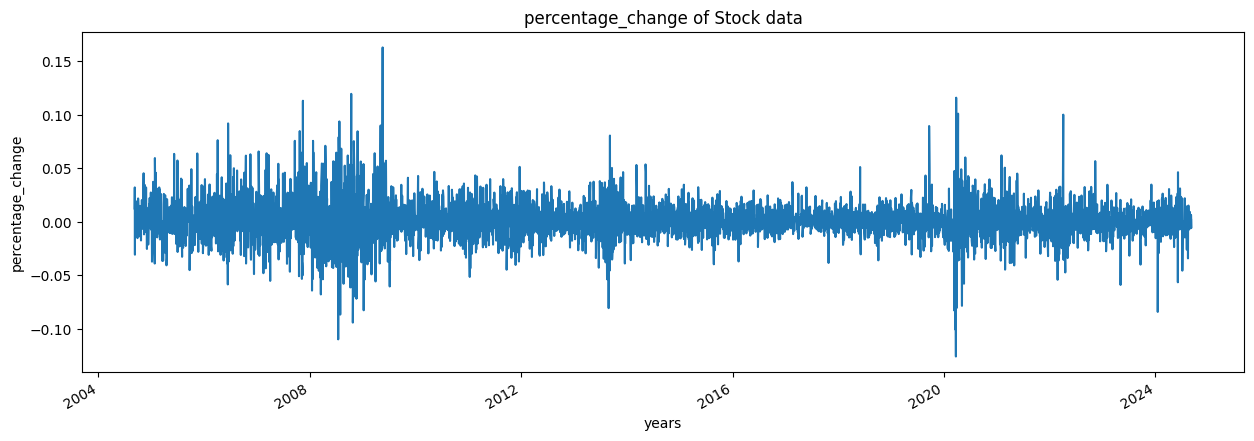

In [27]:
plot_graph((15,5), Stock_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = Stock_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([1768.65002441]), array([32.48313904]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [2.30670324e-04],
       [8.38374922e-04],
       ...,
       [9.26936761e-01],
       [9.29039038e-01],
       [9.24143195e-01]])

In [31]:
len(scaled_data)

4941

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.        ],
        [0.00023067],
        [0.00083837],
        [0.00023564],
        [0.00061762],
        [0.00055809],
        [0.00070195],
        [0.00089294],
        [0.00090782],
        [0.0012774 ],
        [0.00138406],
        [0.00144111],
        [0.00173876],
        [0.00164947],
        [0.00136422],
        [0.00105664],
        [0.00138654],
        [0.00133693],
        [0.00123276],
        [0.00166683],
        [0.00193223],
        [0.00193967],
        [0.0017338 ],
        [0.00163706],
        [0.00161722],
        [0.00157505],
        [0.00129725],
        [0.00129725],
        [0.00114842],
        [0.00144111],
        [0.00157753],
        [0.00186278],
        [0.00167427],
        [0.00131708],
        [0.00131708],
        [0.00161722],
        [0.00158001],
        [0.00199176],
        [0.00192479],
        [0.00188262],
        [0.00220012],
        [0.00216291],
        [0.00252009],
        [0.00237622],
        [0.00274828],
        [0

In [34]:

int(len(x_data)*0.7)

3388

In [35]:
4908-100-int(len(x_data)*0.7)

1420

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3388, 100, 1)
(3388, 1)
(1453, 100, 1)
(1453, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\burid\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 98s 28ms/step - loss: 6.4495e-04
Epoch 2/2
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 100s 29ms/step - loss: 1.6264e-04


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [44]:
predictions

array([[0.5251208 ],
       [0.5242626 ],
       [0.52259666],
       ...,
       [0.89362746],
       [0.89504164],
       [0.8967449 ]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 944.1804],
       [ 942.6905],
       [ 939.7981],
       ...,
       [1583.9695],
       [1586.4248],
       [1589.382 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 939.84075928],
       [ 936.58032227],
       [ 951.40667725],
       ...,
       [1641.80004883],
       [1645.44995117],
       [1636.94995117]])

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

40.89012321962208

In [49]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = Stock_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-17,939.840759,944.180420
2018-10-19,936.580322,942.690491
2018-10-22,951.406677,939.798096
2018-10-23,944.719421,942.369141
2018-10-24,948.241516,942.906982


<Figure size 640x480 with 0 Axes>

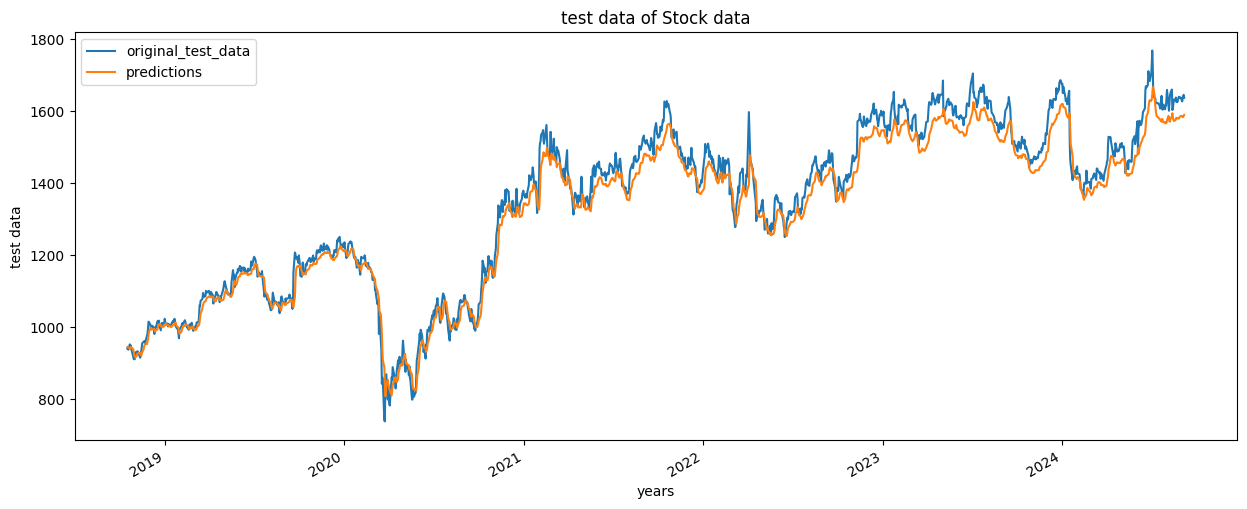

In [50]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

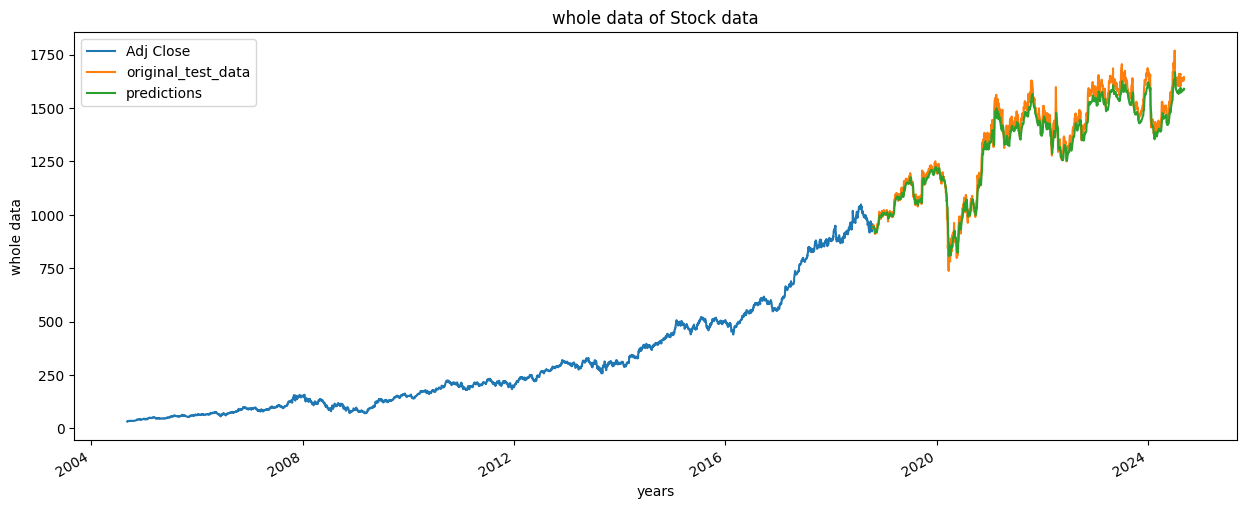

In [51]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [52]:
model.save("Latest_stock_price_model.keras")